In [1]:
import numpy as np
from concreteproperties.material import Concrete, SteelBar, SteelStrand
from concreteproperties.stress_strain_profile import (
    ConcreteLinear,
    RectangularStressBlock,
    SteelElasticPlastic,
    StrandProfile,
)
from sectionproperties.pre.library.primitive_sections import rectangular_section
from concreteproperties.pre import add_bar, add_bar_rectangular_array
from concreteproperties.concrete_section import ConcreteSection

In [2]:
concrete = Concrete(
    name="40 MPa Concrete",
    density=2.4e-6,
    stress_strain_profile=ConcreteLinear(elastic_modulus=32.8e3),
    ultimate_stress_strain_profile=RectangularStressBlock(
        compressive_strength=40,
        alpha=0.79,
        gamma=0.87,
        ultimate_strain=0.003,
    ),
    flexural_tensile_strength=3.8,
    colour="lightgrey",
)

steel = SteelBar(
    name="500 MPa Steel",
    density=7.85e-6,
    stress_strain_profile=SteelElasticPlastic(
        yield_strength=500,
        elastic_modulus=200e3,
        fracture_strain=0.05,
    ),
    colour="grey",
)

strand = SteelStrand(
    name="1830 MPa Strand",
    density=7.85e-6,
    stress_strain_profile=StrandProfile(
        yield_strength=1500,
        elastic_modulus=195e3,
        fracture_strain=0.035,
        breaking_strength=1830,
    ),
    colour="slategrey",
    prestress_force=1350e3,
)

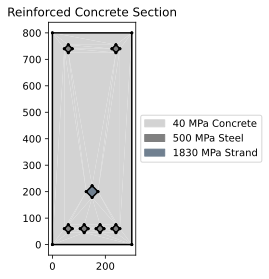

<AxesSubplot: title={'center': 'Reinforced Concrete Section'}>

In [3]:
geom = rectangular_section(d=800, b=300, material=concrete)

# add top steel bars
geom = add_bar_rectangular_array(
    geometry=geom, area=450, material=steel, n_x=2, x_s=180, anchor=(60, 740)
)

# add bottom steel bars
geom = add_bar_rectangular_array(
    geometry=geom, area=450, material=steel, n_x=4, x_s=60, anchor=(60, 60)
)

# add prestressing strand
geom = add_bar(
    geometry=geom,
    area=986,
    material=strand,
    x=150,
    y=200,
)

conc_sec = ConcreteSection(geometry=geom)
conc_sec.plot_section()

In [4]:
# gross_props = conc_sec.get_gross_properties()
# gross_props.print_results(fmt=".3e")

In [5]:
# transformed_props = conc_sec.get_transformed_gross_properties(elastic_modulus=32.8e3)
# transformed_props.print_results(fmt=".3e")

In [6]:
print(strand.get_prestress_strain(area=986))

0.0070213761897331885


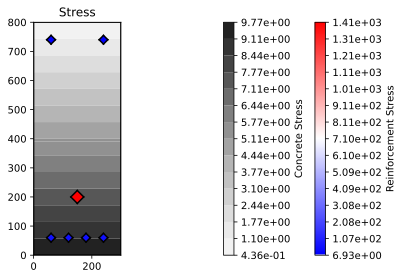

<AxesSubplot: title={'center': 'Stress'}>

In [7]:
res = conc_sec.calculate_uncracked_stress(n=1350e3, m_x=-170e6)
res.plot_stress()

In [8]:
from rich.pretty import pprint

pprint(res)

StressResult(
│   concrete_section=<concreteproperties.concrete_section.ConcreteSection object at 0x000002CFEA920C10>,
│   concrete_analysis_sections=[
│   │   <concreteproperties.analysis_section.AnalysisSection object at 0x000002CFAB5BAA60>,
│   │   <concreteproperties.analysis_section.AnalysisSection object at 0x000002CFEA7A6880>
│   ],
│   concrete_stresses=[
│   │   array([5.2196243 , 0.43554721, 0.43554721, 5.2196243 , 1.31110734,
│      1.13599531, 0.96088329, 1.13599531, 1.13599531, 1.31110734,
│      1.13599531, 0.96088329]),
│   │   array([9.77485526, 9.77485526, 5.2196243 , 5.2196243 , 8.89929513,
│      9.07440716, 9.24951918, 9.07440716, 9.07440716, 8.89929513,
│      9.07440716, 9.24951918, 9.24951918, 9.07440716, 8.89929513,
│      9.07440716, 9.07440716, 9.24951918, 9.07440716, 8.89929513,
│      7.18082039, 7.44002825, 7.69923611, 7.44002825])
│   ],
│   concrete_forces=[
│   │   (346602.19887118996, -2.6345265077772153e-14, 146.52437712699438),
│   │   (853953.9010280912, 2.0538223208388628e-14, -212.85952904175218)
│   ],
│   meshed_reinforcement_sections=[],
│   meshed_reinforcement_stresses=[],
│   meshed_reinforcement_forces=[],
│   lumped_reinforcement_geometries=[
│   │   <concreteproperties.pre.CPGeom object at 0x000002CFEA98D220>,
│   │   <concreteproperties.pre.CPGeom object at 0x000002CFEA98D340>,
│   │   <concreteproperties.pre.CPGeom object at 0x000002CFEA98D610>,
│   │   <concreteproperties.pre.CPGeom object at 0x000002CFEA98D130>,
│   │   <concreteproperties.pre.CPGeom object at 0x000002CFEA98D670>,
│   │   <concreteproperties.pre.CPGeom object at 0x000002CFEA98D730>
│   ],
│   lumped_reinforcement_stresses=[
│   │   6.926800686271839,
│   │   6.926800686271818,
│   │   55.331750950259966,
│   │   55.33175095025996,
│   │   55.331750950259945,
│   │   55.33175095025994
│   ],
│   lumped_reinforcement_strains=[
│   │   3.4634003431359195e-05,
│   │   3.463400343135909e-05,
│   │   0.0002766587547512998,
│   │   0.0002766587547512998,
│   │   0.0002766587547512997,
│   │   0.0002766587547512997
│   ],
│   lumped_reinforcement_forces=[
│   │   (3117.060308822328, -89.99999999999994, 349.80141700627627),
│   │   (3117.0603088223183, 90.00000000000006, 349.80141700627627),
│   │   (24899.287927616984, -89.99999999999994, -330.19858299372373),
│   │   (24899.28792761698, -29.999999999999943, -330.19858299372373),
│   │   (24899.287927616977, 30.000000000000057, -330.19858299372373),
│   │   (24899.287927616973, 90.00000000000006, -330.19858299372373)
│   ],
│   strand_geometries=[<concreteproperties.pre.CPGeom object at 0x000002CFEA98D3D0>],
│   strand_stresses=[1413.4002706231665],
│   strand_strains=[0.0072482065160162385],
│   strand_forces=[(1393612.6277726057, 2.842170943040401e-14, -190.1985829937237)]
)